In [25]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import glob
from sklearn.utils import shuffle
from skimage.transform import resize

In [2]:
jeans = glob.glob('Ecommerce Dataset/ecommerce products/jeans/*.jpg')
sofa = glob.glob('Ecommerce Dataset/ecommerce products/sofa/*.jpg')
tshirt = glob.glob('Ecommerce Dataset/ecommerce products/tshirt/*.jpg')
tv = glob.glob('Ecommerce Dataset/ecommerce products/tv/*.jpg')

In [3]:
image = []
label = []
for i in jeans:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in sofa:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

for i in tshirt:
    img = plt.imread(i)
    image.append(img)
    label.append(2)

for i in tv:
    img = plt.imread(i)
    image.append(img)
    label.append(3)

In [4]:
num_images = len(image)
num_images

796

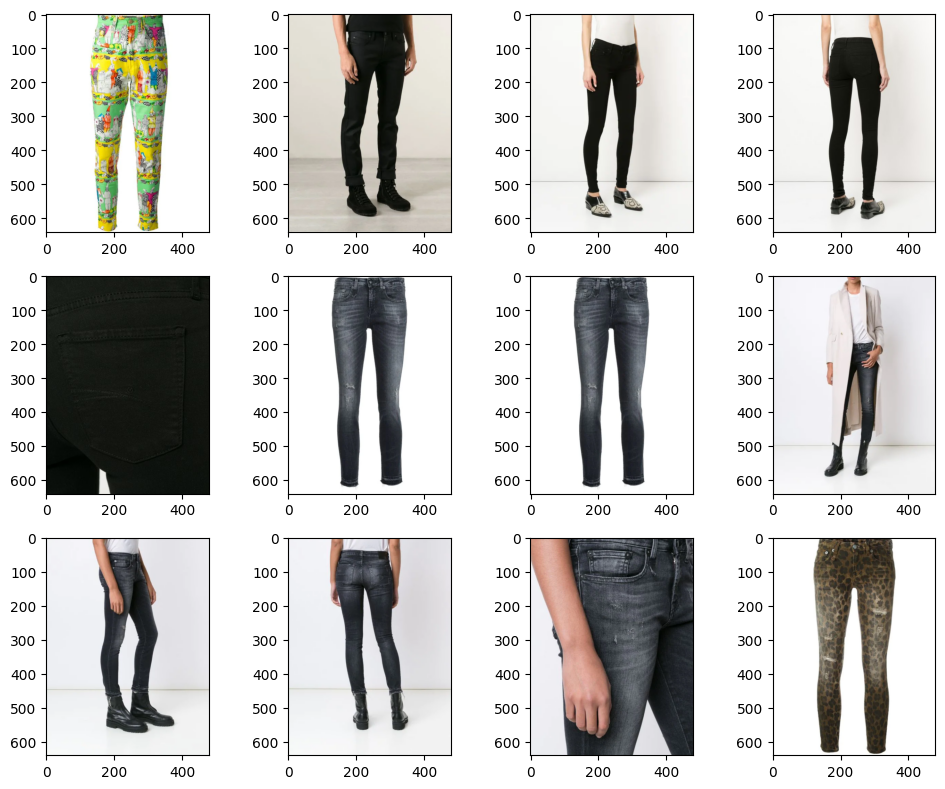

In [5]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
plt.tight_layout()

In [6]:
image, label = shuffle(image, label)

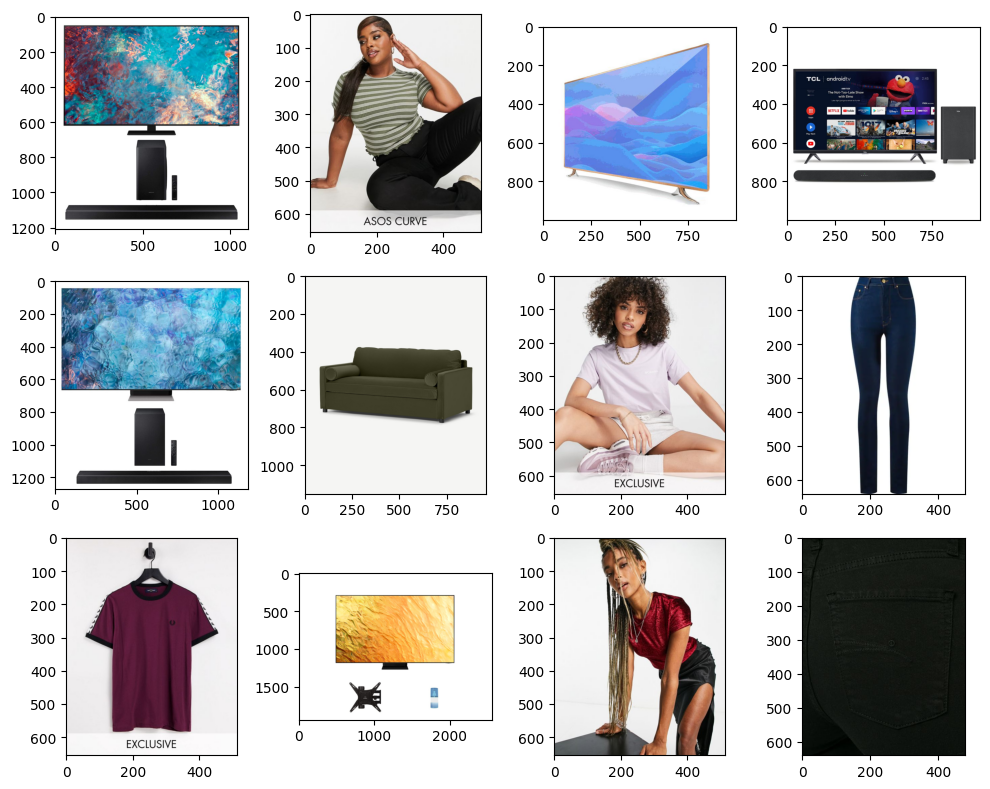

In [7]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
plt.tight_layout()

In [8]:
for i in range(10):
    print(image[i].shape)

(1211, 1100, 3)
(655, 513, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1269, 1180, 3)
(1151, 959, 3)
(655, 513, 3)
(641, 480, 3)
(655, 513, 3)
(1938, 2560, 3)


In [9]:
x = []
for i in image:
    x.append(resize(i,(500,500,3)))

In [11]:
x = np.array(x)
y = np.array(label)

In [12]:
d1, d2, d3, d4 = x.shape
x = x.reshape((d1,d2*d3*d4))

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3)

In [14]:
from sklearn.svm import SVC
model = SVC()
%time model.fit(x_train, y_train)

CPU times: total: 3min 11s
Wall time: 3min 47s


SVC()

In [15]:
%time y_pred = model.predict(x_test)

CPU times: total: 1min 51s
Wall time: 3min 42s


In [16]:
y_pred

array([3, 2, 0, 3, 1, 2, 0, 1, 2, 2, 2, 0, 2, 3, 1, 1, 3, 0, 3, 3, 0, 0,
       1, 3, 1, 1, 1, 1, 3, 3, 2, 3, 0, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1, 1,
       1, 1, 2, 1, 0, 2, 0, 0, 0, 3, 1, 3, 0, 3, 0, 1, 1, 2, 2, 0, 0, 1,
       2, 1, 1, 0, 2, 2, 3, 2, 3, 0, 2, 3, 3, 2, 3, 2, 3, 3, 1, 2, 3, 1,
       3, 0, 1, 1, 3, 3, 1, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 3, 3, 3, 3, 2,
       0, 1, 3, 2, 1, 3, 0, 1, 2, 1, 2, 3, 1, 0, 3, 3, 0, 3, 0, 2, 2, 2,
       1, 0, 2, 3, 2, 1, 1, 3, 3, 3, 3, 1, 2, 0, 2, 1, 2, 0, 2, 3, 1, 2,
       1, 1, 2, 0, 0, 1, 1, 1, 0, 3, 3, 2, 0, 2, 3, 2, 2, 1, 1, 0, 2, 3,
       1, 2, 1, 0, 0, 1, 1, 1, 3, 2, 2, 3, 1, 2, 0, 3, 3, 0, 2, 1, 0, 3,
       3, 3, 0, 0, 2, 3, 1, 1, 3, 0, 2, 3, 2, 0, 0, 0, 3, 2, 1, 2, 3, 2,
       3, 0, 1, 1, 2, 1, 0, 1, 0, 0, 3, 2, 3, 1, 3, 2, 2, 2, 0])

In [20]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [23]:
accuracy_score(y_test,y_pred)

0.9288702928870293

In [26]:
sns.heatmap(confusion_matrix(y_test,y_pred))

ValueError: Must pass 2-d input. shape=()

In [ ]:
print(model.classification_report(y_test,y_pred))